In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



In [3]:
#importing the dataset
dataset=pd.read_csv('creditcard.csv')

dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


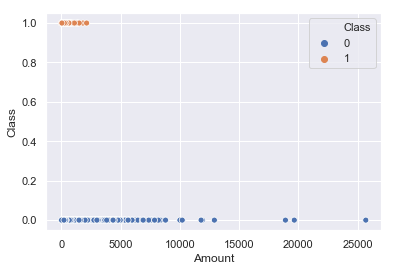

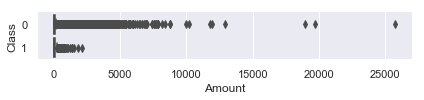

In [7]:
#visualizing Class vs Amount scatter plot

ax = sns.scatterplot(x="Amount", y="Class", hue='Class', data=dataset)


g = sns.catplot(x="Amount", y="Class", 
                kind="box", orient="h", height=1.5, aspect=4,
                data=dataset)



In [8]:
# getting the features matrix and label vector
X= dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values



In [9]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=0)


In [10]:
#Scaling the training and test set
from sklearn.preprocessing import StandardScaler

Sc_X= StandardScaler()
X_train=Sc_X.fit_transform(X_train)
X_test=Sc_X.transform(X_test)


In [11]:
##############-----fitting the logistic model to the training set----###########3
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#predicting y_test
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
#statistical resulsts
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.66      0.75       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [14]:
#the confusion matrix logistic regresiion
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[71071    11]
 [   41    79]]


In [15]:
####################----Fitting KNN model to the Training set----############

from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(metric='minkowski',p=2)
KNNclassifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
#predicting the results
y_pred= KNNclassifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
#statistical resulsts
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.91      0.77      0.83       120

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [18]:
#the confusion matrix logistic regresiion
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[71073     9]
 [   28    92]]


In [19]:
#According to the results of the analysis, we obtained 52 wrong predictions from the logistic regression model but only 37 
# wrong predictions from the KNN model